In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [187]:
def load_data():
    """
    Returns:
    X - training data with dimensions (n_of_features, n_of_examples)
    Y - labels (1 on the class index, -1 elsewhere) with dimensions (n_of_features, n_of_examples)
    """
    x1 = []
    x2 = []
    classes = []
    with open('tren_data2_06.txt') as f:
        for line in f:
            line = line.split()
            
            x1.append(float(line[0]))
            x2.append(float(line[1]))
            classes.append(int(float(line[2])))
    
    X = np.array([[x1, x2] for x1, x2 in zip(x1, x2)])
    
    classes = np.array(classes)
    """
    Y = np.zeros(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = 1
    """
    Y = np.ones(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = -1
    Y = -Y

    return X.T, Y.T, classes

In [188]:
X, Y, classes = load_data()

print(X[:,0])
print(Y[:,0])
# print(classes)

[ 7.6919123 -6.8810342]
[ 1. -1. -1. -1. -1.]


In [189]:
def plotPoints(X, classes):
    plt.figure(figsize=(10, 7))
    X = np.array(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes)
    plt.title("Zobrazení dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.savefig('obr/data1.png') # NUTNO ZMENIT PRO DANA DATA
    plt.show()

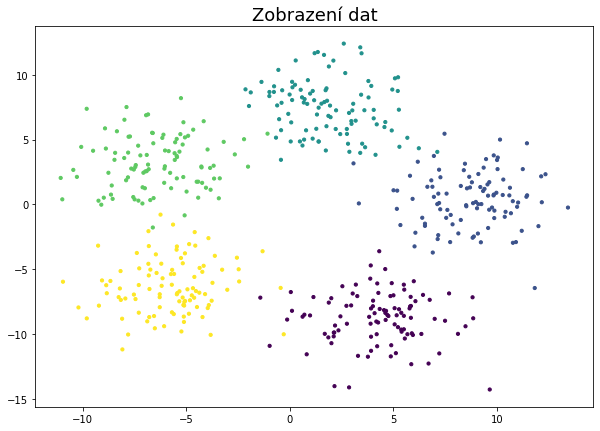

In [190]:
plotPoints(X.T, classes)

## Building blocks

### Initialization

In [191]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h, n_x) * 0.1
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.1
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [192]:
# parametry site
parameters = initialize_parameters(2, 5, 5)
#print("W1 = " + str(parameters["W1"]))
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))

print("W1.shape = " + str(parameters["W1"].shape))
print("b1.shape = " + str(parameters["b1"].shape))
print("W2.shape = " + str(parameters["W2"].shape))
print("b2.shape = " + str(parameters["b2"].shape))

W1.shape = (5, 2)
b1.shape = (5, 1)
W2.shape = (5, 5)
b2.shape = (5, 1)


### Forward Propagation

In [193]:
def tanh(x, slope):
    # POZN. - numpy ma vlastni tanh
    t = 2 / (1+np.exp(-slope*x)) - 1
    return t

In [194]:
def forward_propagation(X, parameters, slope):
    """
    Argument:
    X - input data of size (n_x, m)
    parameters - python dictionary containing parameters
    slopes - list of slope values
    
    Returns:
    A2 - The output of neural network
    cache - dictionary containing "Z1", "A1", "Z2", "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1, slope[0])
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh(Z2, slope[1])
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [195]:
slope = [1, 1]
A2, cache = forward_propagation(X, parameters, slope)

In [196]:
print(A2.shape)
# priklad vystupu neuronove site
print(A2[:,0])

(5, 500)
[ 0.00606868 -0.00329756 -0.0263026  -0.00270136 -0.00213174]


### Compute Cost

In [197]:
def compute_cost(A, Y):
    """
    Argument:
    A - output of neural network
    Y - correct label
    
    Returns:
    E - error across all training examples
    """
    
    cost_vec = np.zeros((Y.shape[1],1))
    
    for i in range(Y.shape[1]):
        cost_vec[i,0] = np.dot((Y-A)[:,i], (Y-A)[:,i].T)
    
    #print(cost_vec.shape)
    summed_cost = np.sum(cost_vec, axis=0)
    #print(summed_cost)
    
    E = 1/2 * summed_cost[0]
    
    return E

In [198]:
E = compute_cost(A2, Y)
print(E)

1252.7992399657574


### Backward propagation

In [199]:
def backward_propagation(X, Y, parameters, cache, slope):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = (Y - A2) * (slope[1]/2) * (1 - np.power(A2,2))
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * (np.sum(dZ2,axis=1,keepdims=True))
    
    dZ1 = np.dot(W2.T,dZ2) * (slope[0]/2) * (1 - np.power(A1,2)) # no ale nenasobim to tim np.sum((Y - A2),axis=0)
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,}
    
    return grads

In [200]:
print(parameters["W2"])
grads = backward_propagation(X, Y, parameters, cache, slope)
print(grads["dW2"])

[[-2.11346624e-02  8.24303174e-02 -1.24660685e-02  5.82732003e-04
  -6.45334791e-02]
 [-8.97011324e-02  8.50338595e-02  1.85784854e-01  1.39776429e-01
   1.46325784e-01]
 [ 1.03663981e-01 -1.18251224e-01 -2.59772223e-02 -1.04554405e-01
   4.72755198e-02]
 [-1.43061443e-04 -1.31825947e-01  9.64099552e-02  5.19785953e-02
  -1.52577750e-01]
 [-1.44008141e-02 -7.79945974e-02  8.75839880e-02  1.02441056e-01
   9.26498889e-02]]
[[-0.03747512  0.03214692 -0.03140067  0.0198546   0.01050767]
 [-0.09739201 -0.09447717 -0.04685674  0.01272122 -0.04489772]
 [-0.01732685 -0.08651339  0.01081639 -0.01666879 -0.03659131]
 [ 0.10101952  0.03573233  0.06210928 -0.02844367  0.01985802]
 [ 0.09475831  0.10038551  0.04063752 -0.00818253  0.04802881]]


### Update parameters

In [201]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 + learning_rate * dW1
    b1 = b1 + learning_rate * db1
    W2 = W2 + learning_rate * dW2
    b2 = b2 + learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [202]:
learning_rate = 0.1
slope = [1, 1]
print(parameters["W2"])

A2, cache = forward_propagation(X, parameters, slope)
print("\n" + "Output of neural network before update: \n" + str(A2[:,0]) + "\n")

parameters = update_parameters(parameters, grads, learning_rate)
print(parameters["W2"])

[[-2.11346624e-02  8.24303174e-02 -1.24660685e-02  5.82732003e-04
  -6.45334791e-02]
 [-8.97011324e-02  8.50338595e-02  1.85784854e-01  1.39776429e-01
   1.46325784e-01]
 [ 1.03663981e-01 -1.18251224e-01 -2.59772223e-02 -1.04554405e-01
   4.72755198e-02]
 [-1.43061443e-04 -1.31825947e-01  9.64099552e-02  5.19785953e-02
  -1.52577750e-01]
 [-1.44008141e-02 -7.79945974e-02  8.75839880e-02  1.02441056e-01
   9.26498889e-02]]

Output of neural network before update: 
[ 0.00606868 -0.00329756 -0.0263026  -0.00270136 -0.00213174]

[[-0.02488217  0.08564501 -0.01560614  0.00256819 -0.06348271]
 [-0.09944033  0.07558614  0.18109918  0.14104855  0.14183601]
 [ 0.1019313  -0.12690256 -0.02489558 -0.10622128  0.04361639]
 [ 0.00995889 -0.12825271  0.10262088  0.04913423 -0.15059195]
 [-0.00492498 -0.06795605  0.09164774  0.1016228   0.09745277]]


In [203]:
A2, cache = forward_propagation(X, parameters, slope)

In [204]:
print("Output of neural network after update: \n" + str(A2[:,0]))

Output of neural network after update: 
[-0.00277328 -0.00413879 -0.05082054 -0.03453945 -0.02223504]


## Model

In [205]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

A = np.array([[12, 5, 2], [20, 4, 8], [ 2, 4, 3], [ 7, 1, 10]])
print(bmatrix(A) + '\n')

\begin{bmatrix}
  12 & 5 & 2\\
  20 & 4 & 8\\
  2 & 4 & 3\\
  7 & 1 & 10\\
\end{bmatrix}



In [184]:
def nn_model(X, Y, slope, learning_rate, num_iterations, print_cost, lowest_accept_error):
    
    cost_list = []
    
    n_x = X.shape[0] # input layer size
    n_h = 20         # hidden layer size
    n_y = Y.shape[0] # output layer size
    
    print("The size of the input layer is: n_x = " + str(n_x))
    print("The size of the hidden layer is: n_h = " + str(n_h))
    print("The size of the output layer is: n_y = " + str(n_y) + "\n")
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    print("First initial weight matrix \n" + str(W1) + "\n")
    print("First initial bias vector \n" + str(b1) + "\n")
    print("Second initial weight matrix \n" + str(W2) + "\n")
    print("Second initial bias vector \n" + str(b2) + "\n")
    
    #print(bmatrix(W1))
    
    trained = False
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters, slope)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(X, Y, parameters, cache, slope)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 20 == 0: # NUTNO ZMENIT PRO DANA DATA
           cost_list.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if cost <= lowest_accept_error:
            cost_list.append(cost)
            
            print("\n" + "Neural network has been trained after %i iterations \n" %i)
            print("Final error is %f \n" %cost)
            trained = True
            break;
            
    if (not trained):
        print("\n" + "Neural network didnt reach desired error value %i" %lowest_accept_error)
        print("Final achieved error is %f \n" %cost)
            
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
            
    print("First final weight matrix \n" + str(W1) + "\n")
    print("First final bias vector \n" + str(b1) + "\n")
    print("Second final weight matrix \n" + str(W2) + "\n")
    print("Second final bias vector \n" + str(b2) + "\n")
    
    #print(bmatrix(W1))
    #print(bmatrix(b1))
    
    return parameters, cost_list

In [206]:
slope = [1, 1] # sklon u tanh funkce

parameters, cost_list = nn_model(X, Y, slope, learning_rate=1, num_iterations=1000,
                                 print_cost=True, lowest_accept_error=25)

#   DATA1
#learning rate = 1
#lowest_accept_error = 1
#num_iterations = 1000, ale skonci to tak po 700,800
#pro vykreslovani - i % 20 nebo 50

#   DATA2
#learning rate = 1
#lowest_accept_error = 25 (ale stacilo by i 30)
#num_iterations = 1000, ale skonci to tak po 700,800
#pro vykreslovani - i % 50

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 20
The size of the output layer is: n_y = 5

First initial weight matrix 
[[ 0.0155882  -0.11474158]
 [ 0.04811727  0.0498877 ]
 [-0.05195941  0.1685059 ]
 [ 0.04203419  0.18757649]
 [ 0.06636633 -0.15040948]
 [-0.09491413 -0.04939571]
 [-0.07431092 -0.13336884]
 [-0.09244228 -0.06671646]
 [-0.07428366  0.06629696]
 [-0.13073403  0.10655846]
 [-0.03616412  0.02072864]
 [-0.05796914 -0.00879459]
 [ 0.02238074 -0.19590328]
 [-0.0965202   0.07165282]
 [ 0.0057184  -0.02316133]
 [ 0.07893662  0.0303206 ]
 [ 0.02734672  0.0795843 ]
 [-0.22533092  0.05108415]
 [ 0.03879463  0.04195925]
 [ 0.00620358  0.02074824]]

First initial bias vector 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Second initial weight matrix 
[[-0.01827379 -0.07611134 -0.14815534  0.03330869  0.14915917 -0.07153421
   0.02361946 -0.00389444  0.14551594  0.06419376  0

In [207]:
A2, cache = forward_propagation(X, parameters, slope)
A2 = np.rint(A2) # round to nearest integer

print("Example of neural network output: " + str(A2[:,220]))
print("Example of correct (expected) output: " + str(Y[:,220]) + "\n")

# print(A2 == Y)
correct_outputs = 0
for i in range(A2.shape[1]):
    if np.array_equal(A2[:,i],Y[:,i]):
        correct_outputs += 1
        
accuracy = correct_outputs / A2.shape[0]
print("Neural network accuracy: " + str(round(accuracy,2)) + "%")

Example of neural network output: [-1. -1.  1. -1. -1.]
Example of correct (expected) output: [-1. -1.  1. -1. -1.]

Neural network accuracy: 97.0%


## Zavislost chyby na trenovacich cyklech

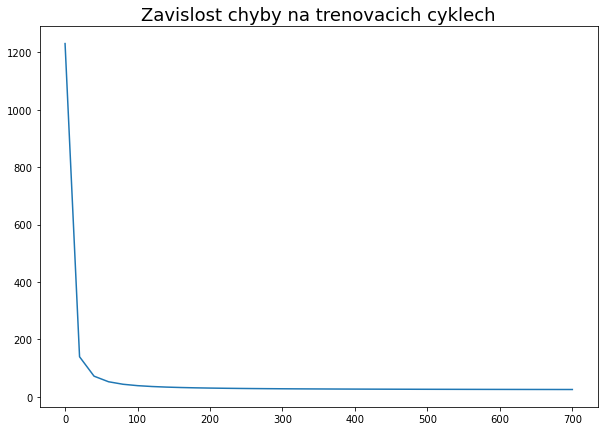

In [209]:
i = range(len(cost_list))
i = [item * 20 for item in i] # CISLO MUSI SEDET S TIM, CO JE V MODELU

# neberu kazdy error, jinak to osciluje hodne, graf je dost necitelny, neni dobre videt trend

plt.figure(figsize=(10, 7))
plt.plot(i, cost_list)
plt.title("Zavislost chyby na trenovacich cyklech", fontsize=18)
ax = plt.gca()
ax.set_facecolor('white')

plt.savefig('obr/nn_2layer_error_data2') # NUTNO ZMENIT PRO DANA DATA
plt.show()

## Klasifikace rastru

In [210]:
def createraster(X, pointsinrow):
    boundary = [np.amax(X[1, :]) + 0.2, np.amax(X[0, :]) + 0.2, np.amin(X[1, :]) - 0.2, np.amin(X[0, :]) - 0.2]  # clockwise
    
    print(np.amax(X[1, :]))
    print(np.amax(X[0, :]))
    print(np.amin(X[1, :]))
    print(np.amin(X[0, :]))
    
    top, right, bottom, left = boundary
    columnpoints = top - bottom
    raster = np.linspace([left, top], [right, top], pointsinrow)
    top -= columnpoints / pointsinrow

    while top >= bottom:
        raster_row = np.linspace([left, top], [right, top], pointsinrow)
        raster = np.concatenate((raster, raster_row), axis=0)
        top -= columnpoints / pointsinrow

    plt.show()

    return raster

In [211]:
pointsinrow = 200  # points in 1 row
raster = createraster(X, pointsinrow)

12.409329
13.435873
-14.29898
-11.071743


In [212]:
raster_classified, cache = forward_propagation(raster.T, parameters, slope)
raster_classified = np.rint(raster_classified)
print(raster_classified[:, 247:250])

[[-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -0.]
 [ 1.  1.  1.]
 [-1. -1. -1.]]


In [213]:
raster_classes = []
points_with_class = []
points_without_class = []
j = 0

for i in range(raster_classified.shape[1]):
    
    column = raster_classified[:,i]
    column_sum = np.sum(column)
    
    if column_sum == -3:
        x = np.squeeze(np.where(column == 1))
        
        if x.size > 0:
            raster_classes.append(x)
            points_with_class.append(raster[i])
        
        """ DEBUG
        j +=1
        if j==247:
            print(raster_classified[:,i])
            print(np.squeeze(np.where(column == 1)))
            print(raster_classes[-1])
        """
        

In [214]:
print(raster_classes[247:250])

[array(2), array(2), array(2)]


## Vykresleni oklasifikovaneho rastru

In [216]:
def plotPoints2(X, classes, Y, classes2):
    X = np.array(X)
    Y = np.array(Y)
    classes = np.array(classes)
    classes2 = np.array(classes2)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=classes2)
    plt.scatter(X[:, 0], X[:, 1], s=26, c=classes, edgecolors='black') # classes nebo pr 'salmon'
    plt.title("Klasifikace bodů vstupního prostoru", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.savefig('obr/nn_2layer_data2')
    plt.show()

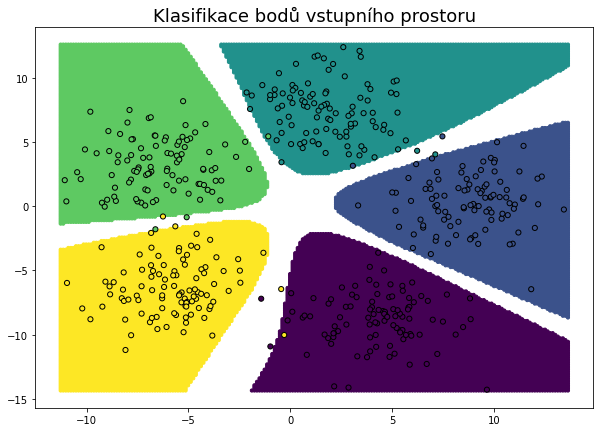

In [217]:
#plotPoints(points_with_class, raster_classes)
#plotPoints(X.T, classes)
plotPoints2(X.T, classes, points_with_class, raster_classes)